# adding the libraries and create a cache folder

In [4]:
import fastf1
import os
from fastf1 import plotting
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

CACHE_DIR = 'cache'
os.makedirs(CACHE_DIR, exist_ok=True)


fastf1.Cache.enable_cache("cache")
plotting.setup_mpl()
print(f"Cache directory ready at: {os.path.abspath(CACHE_DIR)}")

Cache directory ready at: D:\f_1\pythonProject\cache


# Load race data

In [5]:
race = fastf1.get_session(2023, "Monaco", "r")
race.load()
laps = race.laps
laps.head()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cac

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:03:27.435000,VER,1,0 days 00:01:24.238000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:37.420000,...,True,Red Bull Racing,0 days 01:02:02.950000,2023-05-28 13:03:03.927,12,1.0,False,,False,False
1,0 days 01:04:46.802000,VER,1,0 days 00:01:19.367000,2.0,1.0,NaT,NaT,0 days 00:00:20.954000,0 days 00:00:37.366000,...,True,Red Bull Racing,0 days 01:03:27.435000,2023-05-28 13:04:28.412,1,1.0,False,,False,True
2,0 days 01:06:05.876000,VER,1,0 days 00:01:19.074000,3.0,1.0,NaT,NaT,0 days 00:00:20.854000,0 days 00:00:37.288000,...,True,Red Bull Racing,0 days 01:04:46.802000,2023-05-28 13:05:47.779,1,1.0,False,,False,True
3,0 days 01:07:24.005000,VER,1,0 days 00:01:18.129000,4.0,1.0,NaT,NaT,0 days 00:00:20.835000,0 days 00:00:36.637000,...,True,Red Bull Racing,0 days 01:06:05.876000,2023-05-28 13:07:06.853,1,1.0,False,,False,True
4,0 days 01:08:42.024000,VER,1,0 days 00:01:18.019000,5.0,1.0,NaT,NaT,0 days 00:00:20.745000,0 days 00:00:36.734000,...,True,Red Bull Racing,0 days 01:07:24.005000,2023-05-28 13:08:24.982,1,1.0,False,,False,True


# Basic Data Exploration

In [10]:
laps_summary = laps.groupby("Driver")["LapNumber"].max().sort_values(ascending=False)
print(laps_summary)

Driver
ALO    78.0
LEC    78.0
HAM    78.0
GAS    78.0
SAI    78.0
VER    78.0
RUS    78.0
OCO    78.0
DEV    77.0
BOT    77.0
ALB    77.0
NOR    77.0
ZHO    77.0
PIA    77.0
HUL    76.0
PER    76.0
TSU    76.0
SAR    76.0
MAG    71.0
STR    54.0
Name: LapNumber, dtype: float64


# lap time comparission between drivers

In [13]:
laps["LapTimeSeconds"] = laps["LapTime"].dt.total_seconds()
drivers = ["VER", "ALO", "HAM", "OCO", "RUS", "LEC"]
cleaned = laps[laps["Driver"].isin(drivers)]

fig = px.box(
    cleaned,
    x = "Driver",
    y = "LapTimeSeconds",
    points = "all",
    color = "Driver",
    title = "lap time distribution by driver (2023 Monaco GP)",
    labels = {'LapTimeSeconds': 'Lap Time (s)', 'Driver': 'Driver'}
)
fig.show()

# drivers position after each lap

In [16]:
fig = px.line(
    laps[laps["Driver"].isin(drivers)],
    x = "LapNumber",
    y = "Position",
    color = "Driver",
    title = "DRIVER POSITION AFTER EACH LAP",
    labels = {'LapNumber': 'Lap Number', 'Position': 'Position'}

)
fig.update_yaxes(autorange="reversed")
fig.show()

# TELEMETRY VISUALISATION

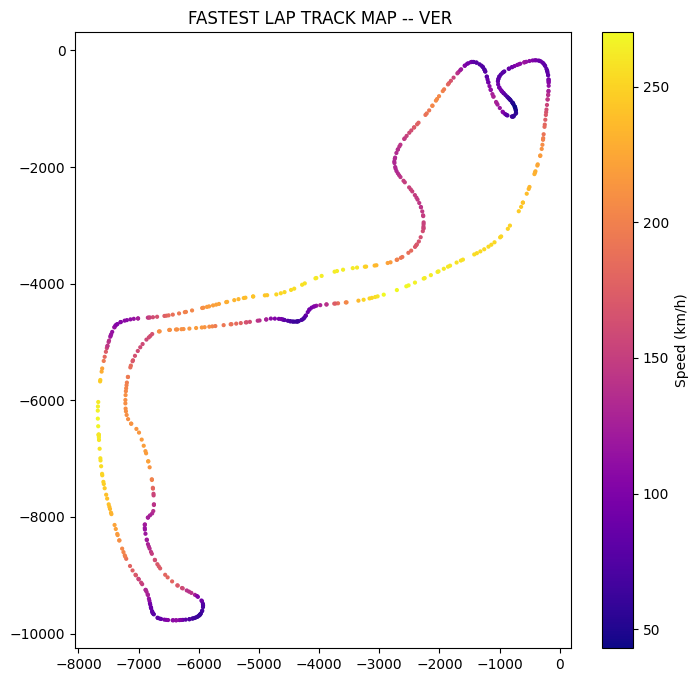

In [32]:
fvt_driver = input(f"Enter driver name: , {"VER", "ALO", "HAM", "OCO", "RUS", "LEC"} ")

fast_lap = laps.pick_drivers(fvt_driver).pick_fastest()
tel = fast_lap.get_telemetry()
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title(f"FASTEST LAP TRACK MAP -- {fast_lap.Driver} ")
sc = ax.scatter(tel["X"], tel["Y"], c = tel["Speed"],   cmap = "plasma", s = 4)
plt.colorbar(sc, label = "Speed (km/h)")
plt.show()

# pit stop analysis

In [43]:
pit_counts = laps.groupby('Driver')['PitOutTime'].count().sort_values()
fig = px.bar(
    pit_counts,
    orientation='h',
    title='Number of Pit Stops per Driver',
    labels={'value': 'Pit Stops', 'index': 'Driver'},
)
fig.show()
